# Congressional Record and Hansard Word Embeddings Analysis


This notebook cotains the code to create a variety of different word embeddings from the Congressional Record and Hansard. Word embeddings are used to investigate the following hypotheses:

- Hypothesis 1 a): Labour and Conservative politicians use more similar language to discuss climate change than they do in general.
- Hypothesis 1 b): The langauge used by Labour and Conservative politicians to discuss climate change has become more similar over time.
- Hypothesis 2: Democrat and Republican politicians use less similar langauage to discuss climate change than they do in general.
- Hypothesis 4: Democrat and Republican politicians use less similar language to discuss climate change than Labour and Conservative politicians.

Word embeddings are generated using the pre-trained `all-MiniLM-L6-v2` model from sentence-transformers.


## Setup


In [1]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

DATA_PATH = 'data/'
DIST_PATH = 'dist/'

plt.style.use('ggplot')

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

congressional_record = pd.read_csv(
    DATA_PATH + 'non_procedural_congressional_record.csv')
hansard = pd.read_csv(DATA_PATH + 'non_procedural_hansard.csv')

climate_congressional_record = pd.read_csv(
    DATA_PATH + 'climate_congressional_record.csv')
climate_hansard = pd.read_csv(DATA_PATH + 'climate_hansard.csv')

/var/folders/g4/5xzy77v17m1fbt0xq_sn3f140000gn/T/ipykernel_57327/4196375112.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/Users/felixwallis/Desktop/UCL Politics and International Relations Course/Dissertation/pir-dissertation/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Generating word embeddings


### Embedding the Congressional Record and Hansard


**Embedding the Congressional Record**


In [4]:
cleaned_stems = congressional_record['cleaned_stems'].tolist()
congressional_record_embeddings = model.encode(
    cleaned_stems, show_progress_bar=True)
np.save(DATA_PATH + 'congressional_record_embeddings.npy',
        congressional_record_embeddings)

Batches: 100%|██████████| 2002/2002 [08:37<00:00,  3.87it/s]


**Embedding Hansard**


In [5]:
cleaned_stems = hansard['cleaned_stems'].tolist()
hansard_embeddings = model.encode(cleaned_stems, show_progress_bar=True)
np.save(DATA_PATH + 'hansard_embeddings.npy', hansard_embeddings)

Batches: 100%|██████████| 3153/3153 [03:15<00:00, 16.13it/s]


### Embedding the Climate Congressional Record and Climate Hansard datasets


**Embedding the Congressional Record**


In [6]:
cleaned_stems = climate_congressional_record['cleaned_stems'].tolist()
climate_congressional_record_embeddings = model.encode(
    cleaned_stems, show_progress_bar=True)
np.save(DATA_PATH + 'climate_congressional_record_embeddings.npy',
        climate_congressional_record_embeddings)

Batches: 100%|██████████| 40/40 [00:04<00:00,  8.73it/s]


**Embedding Hansard**


In [7]:
cleaned_stems = climate_hansard['cleaned_stems'].tolist()
climate_hansard_embeddings = model.encode(
    cleaned_stems, show_progress_bar=True)
np.save(DATA_PATH + 'climate_hansard_embeddings.npy',
        climate_hansard_embeddings)

Batches: 100%|██████████| 198/198 [00:11<00:00, 16.73it/s]


## UMAP Visualisation


In [2]:
umap_model = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine')

congressional_record_embeddings = np.load(
    DATA_PATH + 'congressional_record_embeddings.npy')
hansard_embeddings = np.load(DATA_PATH + 'hansard_embeddings.npy')

### Visualising the Congressional Record and Hansard embeddings


In [3]:
umap_congressional_record_embeddings = umap_model.fit_transform(
    congressional_record_embeddings)
umap_hansard_embeddings = umap_model.fit_transform(hansard_embeddings)

**Congressional Record versus Hansard**


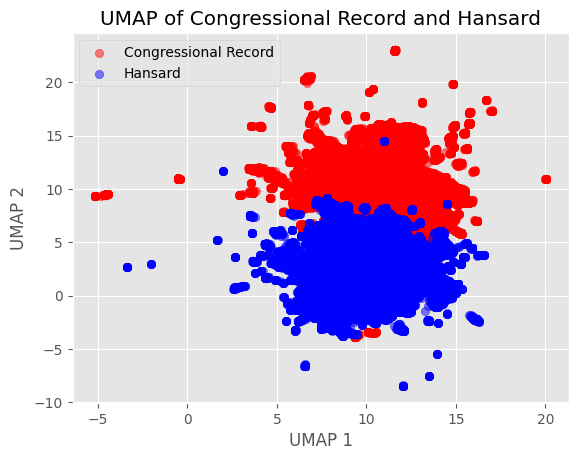

In [9]:
plt.scatter(umap_congressional_record_embeddings[:, 0],
            umap_congressional_record_embeddings[:, 1], alpha=0.5, c='red', label='Congressional Record')
plt.scatter(umap_hansard_embeddings[:, 0],
            umap_hansard_embeddings[:, 1], alpha=0.5, c='blue', label='Hansard')
plt.title('UMAP of Congressional Record and Hansard')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.show()

**Democrat versus Republican**


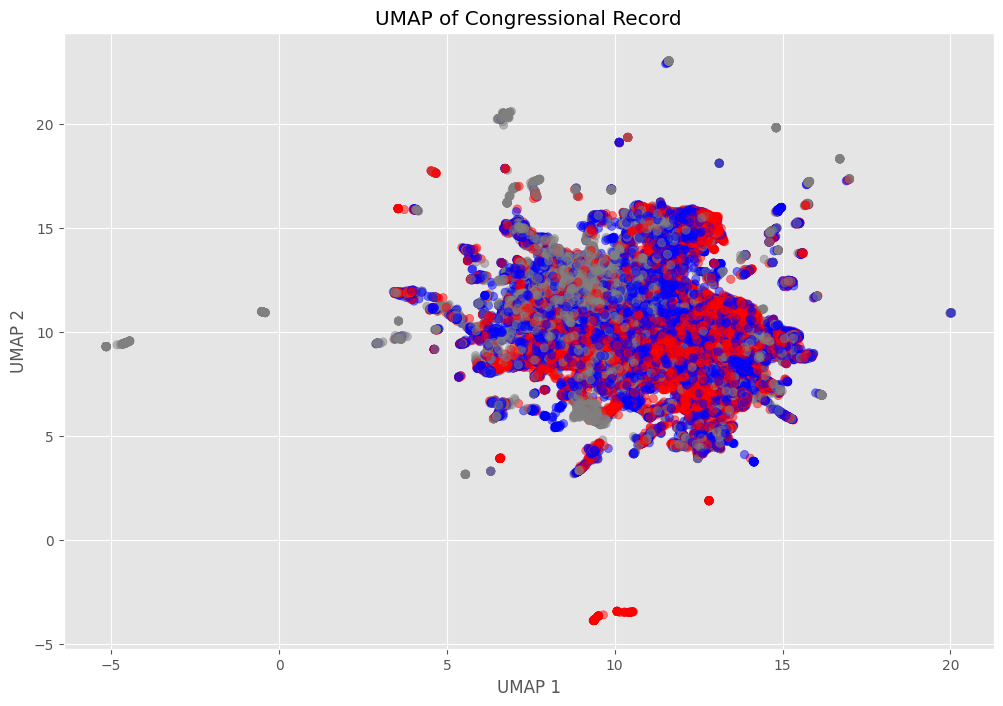

In [7]:
party_colours = {
    'R': 'red',
    'D': 'blue',
}
default_colour = 'grey'
colours = congressional_record['party'].apply(
    lambda x: party_colours.get(x, default_colour))

plt.figure(figsize=(12, 8))
plt.scatter(umap_congressional_record_embeddings[:, 0],
            umap_congressional_record_embeddings[:, 1], alpha=0.5, c=colours)
plt.title('UMAP of Congressional Record')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

**Labour versus Conservative**


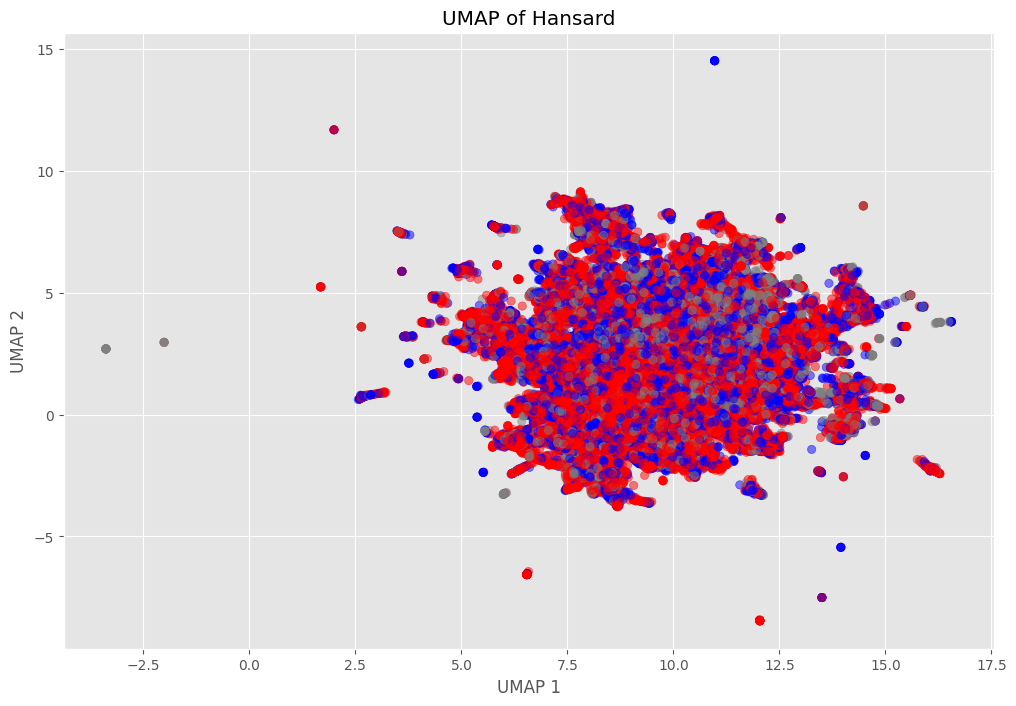

In [8]:
party_colours = {
    'Conservative': 'blue',
    'Labour': 'red',
}
default_colour = 'grey'
colours = hansard['speech_party'].apply(
    lambda x: party_colours.get(x, default_colour))

plt.figure(figsize=(12, 8))
plt.scatter(umap_hansard_embeddings[:, 0],
            umap_hansard_embeddings[:, 1], alpha=0.5, c=colours)
plt.title('UMAP of Hansard')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

**Democrat versus Labour**


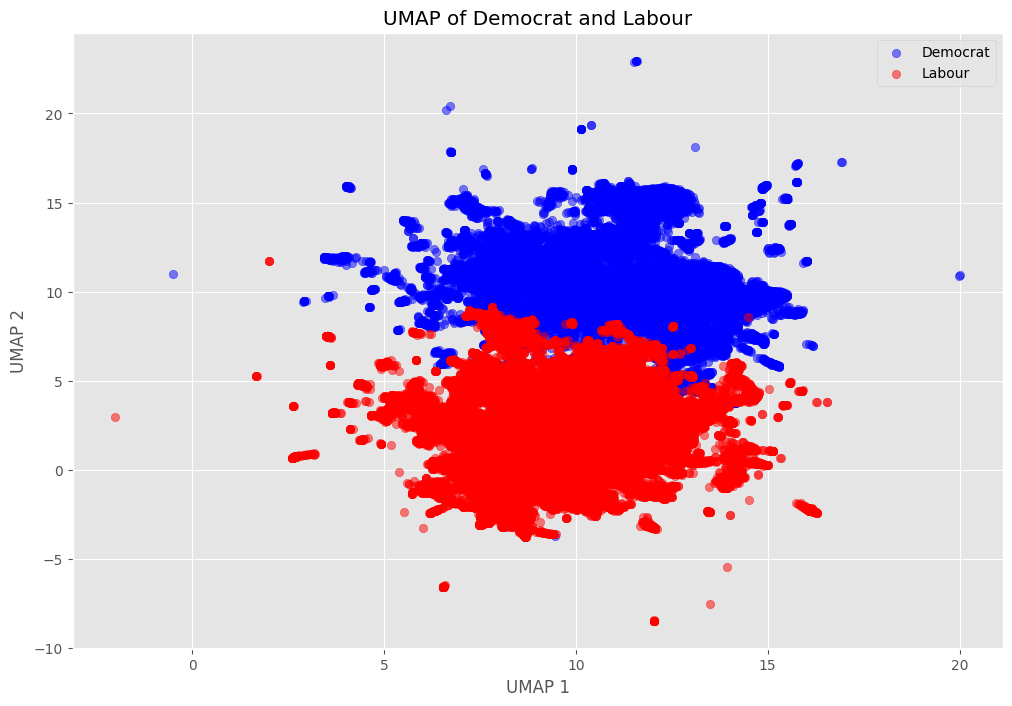

In [11]:
democrat_mask = (congressional_record['party'] == 'D')
labour_mask = (hansard['speech_party'] == 'Labour')

umap_democrat_embeddings = umap_congressional_record_embeddings[democrat_mask]
umap_labour_embeddings = umap_hansard_embeddings[labour_mask]

plt.figure(figsize=(12, 8))
plt.scatter(umap_democrat_embeddings[:, 0],
            umap_democrat_embeddings[:, 1], alpha=0.5, c='blue', label='Democrat')
plt.scatter(umap_labour_embeddings[:, 0],
            umap_labour_embeddings[:, 1], alpha=0.5, c='red', label='Labour')
plt.title('UMAP of Democrat and Labour')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.show()

**Republican versus Conservative**


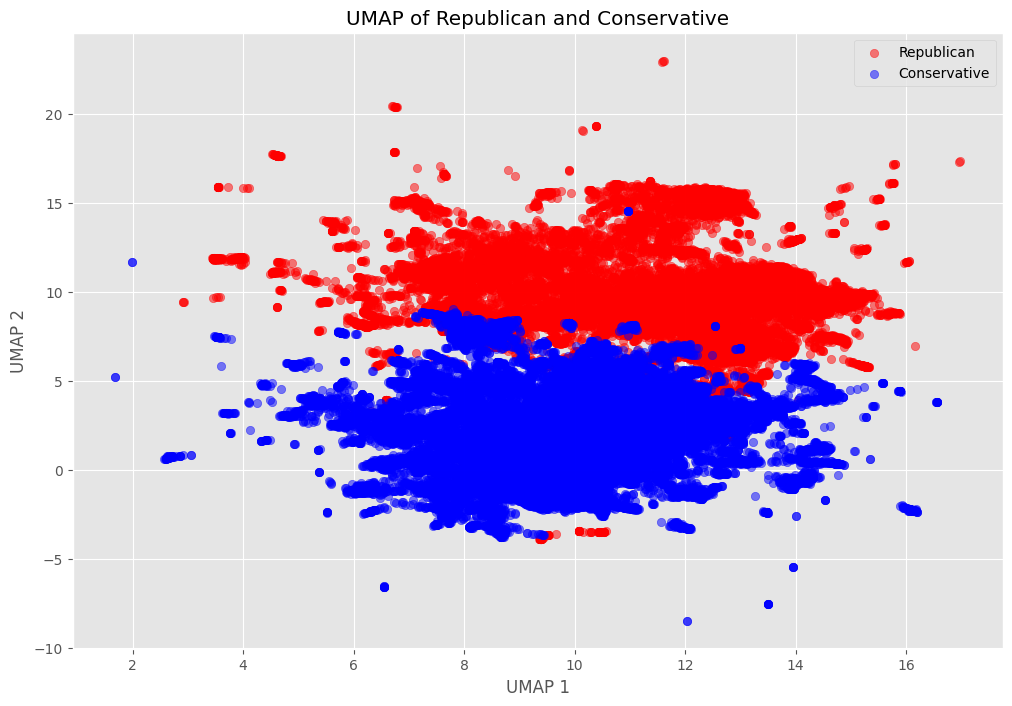

In [12]:
republican_mask = (congressional_record['party'] == 'R')
conservative_mask = (hansard['speech_party'] == 'Conservative')

umap_republican_embeddings = umap_congressional_record_embeddings[republican_mask]
umap_conservative_embeddings = umap_hansard_embeddings[conservative_mask]

plt.figure(figsize=(12, 8))
plt.scatter(umap_republican_embeddings[:, 0],
            umap_republican_embeddings[:, 1], alpha=0.5, c='red', label='Republican')
plt.scatter(umap_conservative_embeddings[:, 0],
            umap_conservative_embeddings[:, 1], alpha=0.5, c='blue', label='Conservative')
plt.title('UMAP of Republican and Conservative')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.show()